In [109]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

import PeriodicBoundary as pb
import Homogenization as hm

#from GeometryBase import GeometryBase 
#gm = 'box_in__box_2d'
#gm = 'diagonal_box_in_box_2d'
#gm = 'straight_channel_2d'
#gm = 'diagonal_channels_2d'
#gm = 'perturbed_channel_2d'
gm = 'vertical_filaments_2d'
#gm = 'circle_in_a_box_2d'
#gm = 'four_boxes_in_a_box_2d'
#gm = 'crossing_channels_2d'

#gm = 'extended_box_3d'
#gm = 'crossing_filaments_3d'
#gm = 'box_in_a_box_3d'
#gm = 'actin_cytosceleton_3d'

if gm == 'box_in__box_2d':
    import GeometryBoxInABox2D as Geometry
elif gm == 'four_boxes_in_a_box_2d':
    import GeometryFourBoxesInABox2D as Geometry
elif gm == 'straight_channel_2d':
    import GeometryStraightChannel2D as Geometry
elif gm == 'perturbed_channel_2d':
    import GeometryPerturbedChannel2D as Geometry
elif gm == 'vertical_filaments_2d':
    import GeometryVerticalFilaments2D as Geometry
elif gm == 'diagonal_channels_2d':
    import GeometryDiagonalChannels2D as Geometry
elif gm == 'crossing_channels_2d':
    import GeometryCrossingChannels2D as Geometry
elif gm == 'diagonal_box_in_box_2d':
    import GeometryDiagonalBoxInABox2D as Geometry
elif gm == 'circle_in_a_box_2d':
    import GeometryCircleInABox2D as Geometry

# 3D meshes
elif gm == 'extended_box_3d':
    import GeometryExtendedBox3D as Geometry
elif gm == 'crossing_filaments_3d':
    import GeometryCrossingFilaments3D as Geometry
elif gm == 'box_in_a_box_3d':
    import GeometryBoxInABox3D as Geometry
elif gm == 'actin_cytosceleton_3d':
    import GeometryActinCytosceleton as Geometry

In [114]:
import importlib
importlib.reload(Geometry)
importlib.reload(hm)

<module 'Homogenization' from '/home/eberhardt/Spine/Git_code/homogenization/code/Homogenization.py'>

In [119]:
geom = Geometry.Geometry(2., 1., resolution=72, ds=36., sc=17.)
print(geom.get_folder())

./../vertical_filaments_2d/


Folder:  ./../vertical_filaments_2d/
number of cells in full mesh:  10368
number of cells in liquid mesh:  848
volume of liquid mesh:  106.0
volume of full mesh:  1296.0
volume of solid:  1190.0
pourosity:  0.08179012345679013


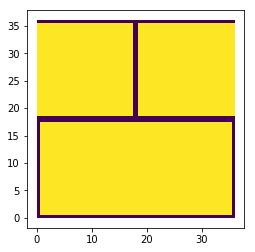

In [118]:

mesh = geom.get_mesh()
liquid_mesh = geom.get_liquid_mesh()

if geom.geometric_dimension() == 2:
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    materials = geom.get_materials()
    plot(materials)
else:
    pass
folder = geom.get_folder()
print('Folder: ',folder)
print('number of cells in full mesh: ',mesh.num_cells())
print('number of cells in liquid mesh: ',liquid_mesh.num_cells())
print('volume of liquid mesh: ', geom.get_liquid_mesh_volume())
print('volume of full mesh: ',geom.get_mesh_volume())
print('volume of solid: ',geom.get_mesh_volume()-geom.get_liquid_mesh_volume())
pourosity = geom.get_liquid_mesh_volume()/geom.get_mesh_volume()
print('pourosity: ',geom.get_liquid_mesh_volume()/geom.get_mesh_volume())

In [67]:
geom.save_materials()
geom.save_boundaries()
geom.save_permittivity()
# geom.test_grid_periodicity('x_1')

In [103]:
xi_phi = hm.reference_cell_solver_potential(geom)

folder = geom.get_folder()

# Save solution in VTK format
file = File(folder + "xi_phi_1.pvd")
file << xi_phi[0]
file = File(folder + "xi_phi_2.pvd")
file << xi_phi[1]
if mesh.geometric_dimension() == 3:
    file = File(folder + "xi_phi_3.pvd")
    file << xi_phi[2]

In [104]:
xi_c = hm.reference_cell_solver_diffusion(geom)

folder = geom.get_folder()

# Save solution in VTK format
file = File(folder + "xi_c_1.pvd")
file << xi_c[0]
file = File(folder + "xi_c_2.pvd")
file << xi_c[1]
if mesh.geometric_dimension() == 3:
    file = File(folder + "xi_c_3.pvd")
    file << xi_c[2]

In [105]:
D = 1.
pourosity = 1.

diffusion_tensor = D * pourosity * hm.diffusion_tensor(xi_c, geom)
print(diffusion_tensor)

Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
[[1.         0.        ]
 [0.         0.01388889]]


In [106]:
permittivity_tensor = hm.permittivity_tensor(xi_phi, geom)
print(permittivity_tensor)

Computing tensor component i,j =  0 0
Computing tensor component i,j =  0 1
Computing tensor component i,j =  1 0
Computing tensor component i,j =  1 1
[[ 1.50000000e+00 -8.62711961e-23]
 [ 4.14235849e-06  1.33466852e+00]]


In [107]:
importlib.reload(hm)
mobility_tensor = hm.mobility_tensor(xi_phi, geom)
print(mobility_tensor)

Computing mobility tensor component i,j =  0 0
Computing mobility tensor component i,j =  0 1
Computing mobility tensor component i,j =  1 0
Computing mobility tensor component i,j =  1 1
[[5.00000000e-01 0.00000000e+00]
 [4.14235849e-06 3.34668518e-01]]


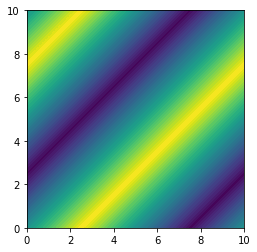

In [63]:
plot(xi_phi[0])

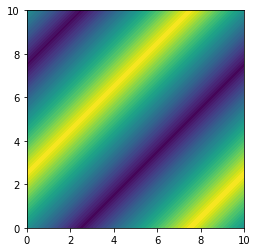

In [64]:
plot(xi_phi[1])

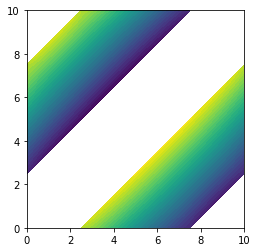

In [65]:
plot(xi_c[0])

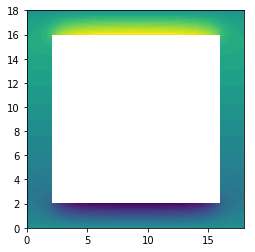

In [27]:
plot(xi_c[1])